In [1]:
!pip install spotipy

     -------------------------------------- 237.8/237.8 kB 1.0 MB/s eta 0:00:00


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import numpy as np
import requests

In [5]:
client=pd.read_csv("spot.csv")


In [6]:
client_id = client.iloc[0,0]
client_secret = client.iloc[0,1]

In [7]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [8]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
track_uri = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        track_uri.append(t['uri'])


In [9]:
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,SZA,Kill Bill,3OHfY25tqY28d16oZczHc8,93,7tYKF4w9nC0nq9CsPZTHyP
1,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,91,3TVXtAsR1Inumwj472S9r4
2,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,95,0iEtIxbK0KxaSlF7G42ZOp
3,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,92,7tYKF4w9nC0nq9CsPZTHyP
4,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,0vjeOZ3Ft5jvAi9SBFJm1j,89,0iEtIxbK0KxaSlF7G42ZOp


In [10]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [11]:
#list of 50 popular artists
track_list = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_list.head(50)

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,SZA,Kill Bill,3OHfY25tqY28d16oZczHc8,93,7tYKF4w9nC0nq9CsPZTHyP,96,"[pop, r&b]",10391977
1,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,91,3TVXtAsR1Inumwj472S9r4,98,"[canadian hip hop, canadian pop, hip hop, rap,...",71495154
2,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,95,0iEtIxbK0KxaSlF7G42ZOp,92,[rap],3660138
3,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,92,7tYKF4w9nC0nq9CsPZTHyP,96,"[pop, r&b]",10391977
4,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,0vjeOZ3Ft5jvAi9SBFJm1j,89,0iEtIxbK0KxaSlF7G42ZOp,92,[rap],3660138
5,Lil Uzi Vert,Just Wanna Rock,4FyesJzVpA39hbYvcseO2d,89,4O15NlyKLIASxsJ0PrXPfz,88,"[melodic rap, philly rap, rap, trap]",14457463
6,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,90,5y8tKLUfMvliMe8IKamR32,83,[bedroom pop],616695
7,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,95,2wY79sveU1sp5g7SokKOiI,90,"[pop, uk pop]",21594220
8,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,93,06HL4z0CvFAxyc27GXpf02,99,[pop],67048164
9,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,86,40ZNYROS4zLfyyBSs2PGe2,86,[oklahoma country],1075459


In [12]:
#popularity based on tracks

track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
2,Creepin' (with The Weeknd & 21 Savage),Metro Boomin
7,Unholy (feat. Kim Petras),Sam Smith
43,La Bachata,Manuel Turizo
17,I'm Good (Blue),David Guetta
0,Kill Bill,SZA
8,Anti-Hero,Taylor Swift
90,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
3,Kill Bill,SZA
40,Calm Down (with Selena Gomez),Rema
30,Made You Look,Meghan Trainor


In [13]:
#Artist popularity based on their followers

by_artist_fol = pd.DataFrame(track_list.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity','artist_name','artist_genres']])
by_artist_fol.astype(str).drop_duplicates().head(60)

,artist_followers,artist_popularity,artist_name,artist_genres
653,108848386,92,Ed Sheeran,"['pop', 'uk pop']"
57,75703426,90,Billie Eilish,"['art pop', 'electropop', 'pop']"
197,71495154,98,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
205,67048164,99,Taylor Swift,['pop']
512,63776106,100,Bad Bunny,"['reggaeton', 'trap latino', 'urbano latino']"
651,60736348,93,BTS,"['k-pop', 'k-pop boy group']"
474,57662200,98,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
725,52377916,91,Rihanna,"['barbadian pop', 'dance pop', 'pop', 'urban c..."
224,45262578,90,Imagine Dragons,"['modern rock', 'rock']"
614,40682575,86,Shawn Mendes,"['canadian pop', 'dance pop', 'pop', 'viral pop']"


In [14]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_list['artist_genres']).value_counts().head(20)

pop                      262
rap                      180
hip hop                   91
trap                      85
contemporary country      78
urbano latino             70
dance pop                 70
r&b                       63
nueva musica mexicana     61
sad sierreno              55
country                   51
reggaeton                 48
trap latino               46
corrido                   45
melodic rap               45
musica mexicana           36
atl hip hop               35
country road              30
k-pop                     30
southern hip hop          29
dtype: int64

Text(0.5, 1.0, 'Top genres')

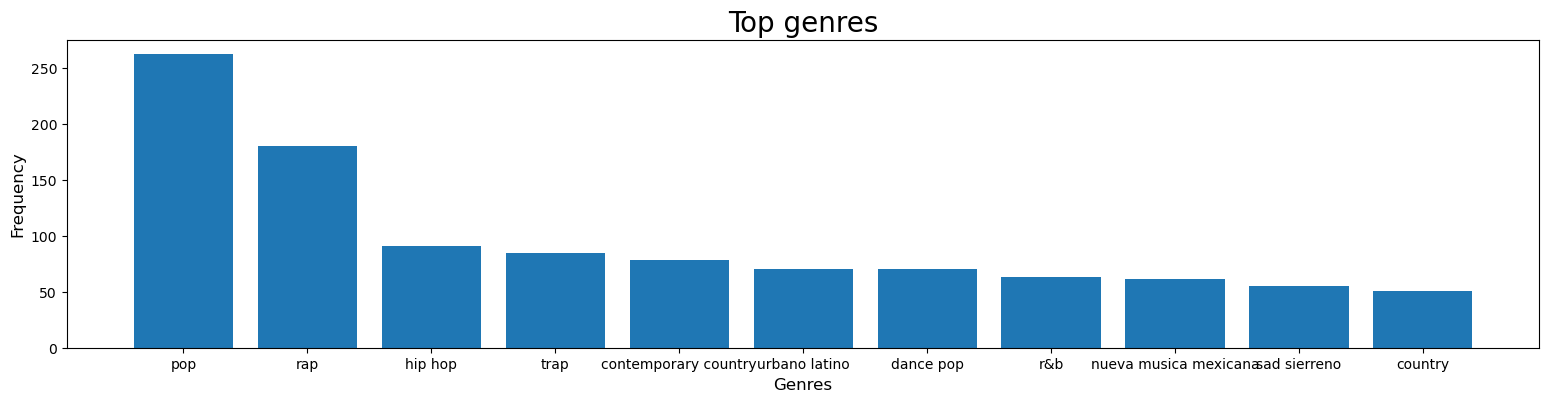

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (19,4))
ax.bar(to_1D(track_list['artist_genres']).value_counts().index[:11],
        to_1D(track_list['artist_genres']).value_counts().values[:11])
ax.set_ylabel("Frequency", size = 12)
ax.set_xlabel("Genres", size = 12)
ax.set_title("Top genres", size = 20)

In [16]:
#popular tracks in 2022

track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
2,Creepin' (with The Weeknd & 21 Savage),Metro Boomin
7,Unholy (feat. Kim Petras),Sam Smith
43,La Bachata,Manuel Turizo
17,I'm Good (Blue),David Guetta
0,Kill Bill,SZA
8,Anti-Hero,Taylor Swift
90,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
3,Kill Bill,SZA
40,Calm Down (with Selena Gomez),Rema
30,Made You Look,Meghan Trainor


In [17]:
top_20_genres = list(to_1D(track_list['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_20_genres:
  for index, row in by_artist_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Drake,hip hop
3,Lil Uzi Vert,trap
4,Luke Combs,contemporary country
5,Bad Bunny,urbano latino
6,Rihanna,dance pop
7,Beyoncé,r&b
8,Christian Nodal,nueva musica mexicana
9,Natanael Cano,sad sierreno


In [18]:
#correlation matrix for audio features

In [22]:
track_features=[]
for t_id in track_df['track_id']:
    af = sp.audio_features(t_id)
    track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()


C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\U

C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\Shermeen\AppData\Local\Temp\ipykernel_6268\450602763.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
1,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
2,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4
3,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
4,0.526,0.606,5,-5.300,0,0.2590,0.1520,0.000002,0.1940,0.492,116.622,audio_features,0vjeOZ3Ft5jvAi9SBFJm1j,spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j,https://api.spotify.com/v1/tracks/0vjeOZ3Ft5jv...,https://api.spotify.com/v1/audio-analysis/0vje...,182667,4


In [23]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
#tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist_name       1000 non-null   object
 1   track_name        1000 non-null   object
 2   track_id          1000 non-null   object
 3   track_popularity  1000 non-null   int64 
 4   artist_id         1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      998 non-null    float64
 1   energy            998 non-null    float64
 2   key               998 non-null    object 
 3   loudness          998 non-null    float64
 4   mode              998 non-null    object 
 5   speechiness       998 non-null    float64
 6   acousticness      998 non-null 

In [24]:

track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['danceability'] = pd.to_numeric(tf_df['danceability'])
tf_df['energy'] = pd.to_numeric(tf_df['energy'])
tf_df['loudness'] = pd.to_numeric(tf_df['loudness'])
tf_df['speechiness'] = pd.to_numeric(tf_df['speechiness'])
tf_df['acousticness'] = pd.to_numeric(tf_df['acousticness'])
tf_df['liveness'] = pd.to_numeric(tf_df['liveness'])
tf_df['valence'] = pd.to_numeric(tf_df['valence'])
tf_df['tempo'] = pd.to_numeric(tf_df['tempo'])



tf_df['time_signature'] = tf_df['time_signature'].astype("category")


In [25]:
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist_name       1000 non-null   string
 1   track_name        1000 non-null   string
 2   track_id          1000 non-null   string
 3   track_popularity  1000 non-null   int64 
 4   artist_id         1000 non-null   string
dtypes: int64(1), string(4)
memory usage: 39.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      998 non-null    float64 
 1   energy            998 non-null    float64 
 2   key               998 non-null    object  
 3   loudness          998 non-null    float64 
 4   mode              998 non-null    object  
 5   speechiness       998 non-null    float64 
 6   acousticness      998 no

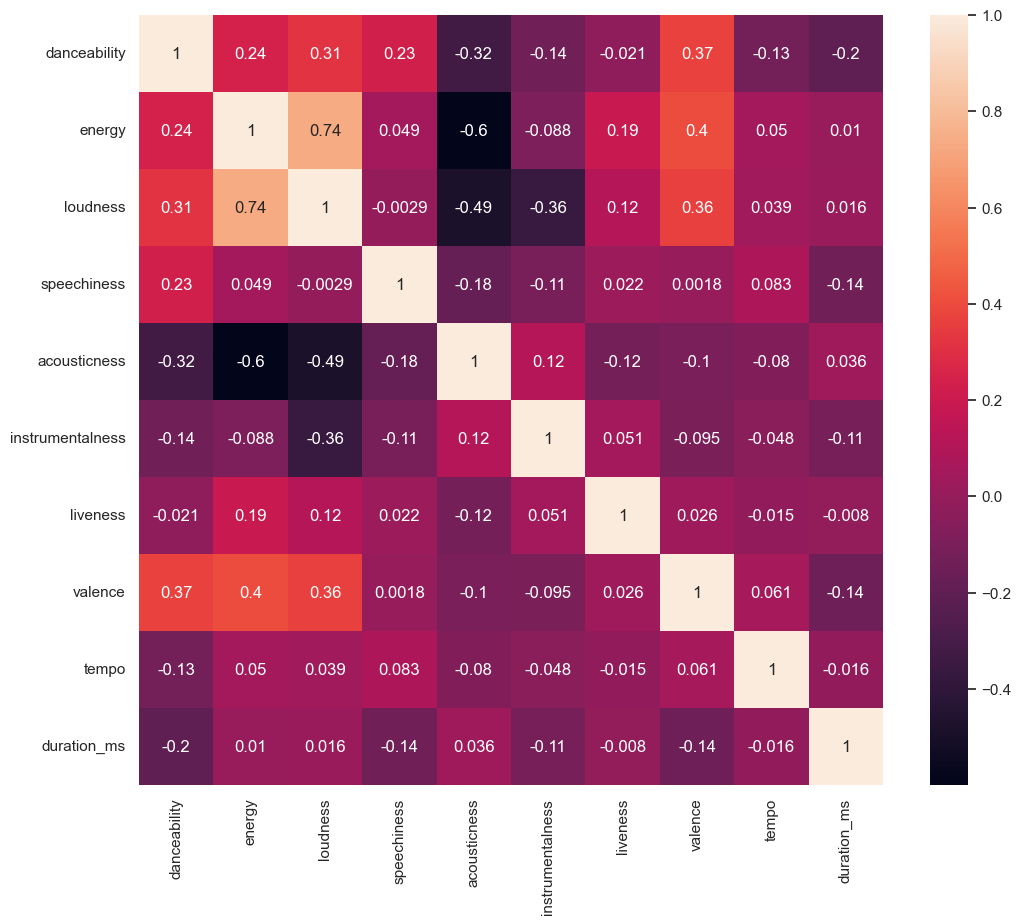

In [26]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

In [112]:
data=sp.artist_top_tracks(artist_id='3Nrfpe0tUJi4K4DXYWgMUX')
print(data)

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6VuMaDnrHyPL1p4EHjYLi7'}, 'href': 'https://api.spotify.com/v1/artists/6VuMaDnrHyPL1p4EHjYLi7', 'id': '6VuMaDnrHyPL1p4EHjYLi7', 'name': 'Charlie Puth', 'type': 'artist', 'uri': 'spotify:artist:6VuMaDnrHyPL1p4EHjYLi7'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/5Jk4Eg7pxYhDrWJCVVzmMt'}, 'href': 'https://api.spotify.com/v1/albums/5Jk4Eg7pxYhDrWJCVVzmMt', 'id': '5Jk4Eg7pxYhDrWJCVVzmMt', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b27335d2e0ed94a934f2cc46fa49', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e0235d2e0ed94a934f2cc46fa49', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d0000485135d2e0ed94a934f2cc46fa49', 'width': 64}], 'name': 'CHARLIE', 'release_date': '2022-10-06', 'release_date_precision': 'day', 'total_tracks': 12, 'type': 'album', 'uri': 'spotify:album:5Jk4

In [113]:
album_name=[]
album_type=[]
tracks=[]
track_name=[]
release=[]
artist_name=[]
for i in range(0,20):
    for i, t in enumerate(data['tracks']):
        album_type.append(t['album']['album_type'])
        tracks.append(t['album']['total_tracks'])
        album_name.append(t['album']['name'])
        track_name.append(t['name'])
        release.append(t['album']['release_date'])
        #artist_name(t['album']['artists'][0]['name'])
            #artist_name.append(z['name'])
        

    
album_df = pd.DataFrame({'album_type': album_type, 'album_name': album_name, 'track_name':track_name, 'tracks':tracks,'release_data':release})
print(album_df.shape)
album_df.drop_duplicates().head()

(200, 5)


,album_type,album_name,track_name,tracks,release_data
0,album,CHARLIE,Left and Right (Feat. Jung Kook of BTS),12,2022-10-06
1,single,Bad Decisions (with BTS & Snoop Dogg),Bad Decisions (with BTS & Snoop Dogg),1,2022-08-05
2,album,Proof,Yet To Come,35,2022-06-10
3,album,BE,Dynamite,8,2020-11-20
4,album,Proof,Run BTS,35,2022-06-10


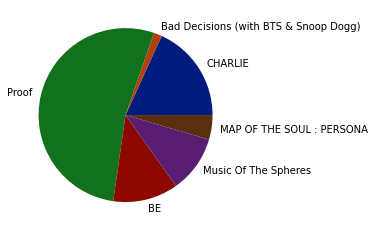

In [171]:
import seaborn as sb
import matplotlib.pyplot as plt

keys = album_df['album_name'].drop_duplicates().values[:6]
data = album_df['tracks'].drop_duplicates().values[:6]

palette_color = sb.color_palette('dark')

plt.pie(data, labels= keys, colors = palette_color)
plt.show()